In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import seaborn as sns

In [5]:
df = pdr.data.DataReader(['DGS6MO','DGS1',
                          'DGS2','DGS5',
                          'DGS7','DGS10',
                          'DGS20','DGS30'], 
                          data_source='fred', 
                          start='01-01-2022', 
                          end='12-31-2022')
df.to_csv('IR_data.csv')
df = df.dropna()

In [6]:
df = df.rename(columns={'DGS6MO': '0.5 yr', 
                        'DGS1': '1 yr',
                        'DGS2': '2 yr',
                        'DGS5': '5 yr',
                        'DGS7': '7 yr',
                        'DGS10': '10 yr',
                        'DGS20': '20 yr',
                        'DGS30': '30 yr'})

<Axes: xlabel='Time', ylabel='IR level'>

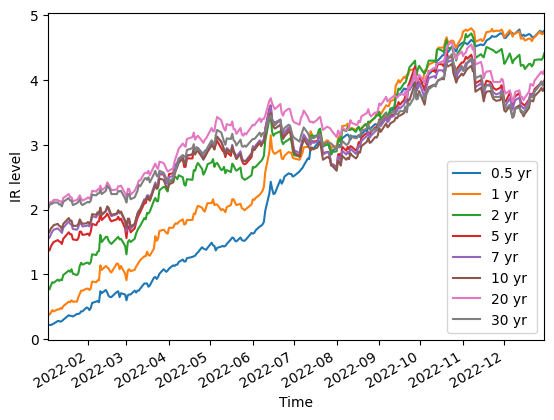

In [7]:
df.plot(xlabel="Time", ylabel="IR level", 
        legend = True, 
        xlim = (df.index.min(), df.index.max()))

Text(0, 0.5, 'IR level')

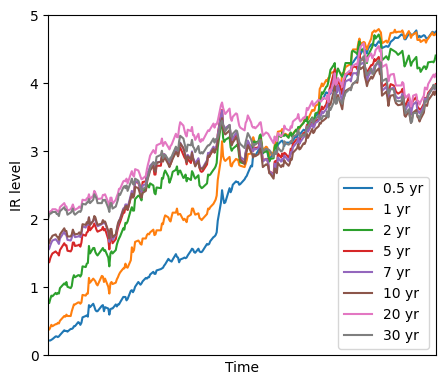

In [8]:
fig, ax = plt.subplots(figsize = (5,5))
df.plot(ax = ax, xlabel="Time", legend = True)
ax.set_xlim((df.index.min(), df.index.max()))
ax.set_ylim((0,5))
ax.set_xticks([])
ax.set_xlabel('Time')
ax.set_ylabel('IR level')

array([[<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
        <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>],
       [<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
        <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>]], dtype=object)

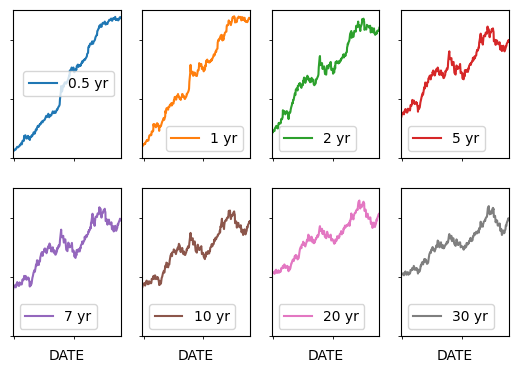

In [9]:
df.plot(subplots=True, layout=(2,4), 
        sharex = True, sharey = True,
        xticks = [],yticks =[],
        xlim = (df.index.min(), df.index.max()))

array([[<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
        <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>],
       [<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
        <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>]], dtype=object)

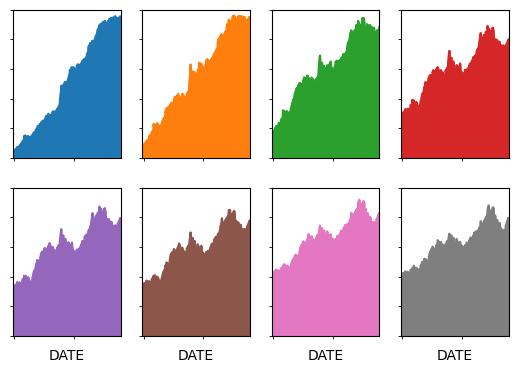

In [10]:
df.plot.area(subplots=True, layout=(2,4), 
             sharex = True, sharey = True,
             xticks = [],yticks =[],
             xlim = (df.index.min(), df.index.max()),
             ylim = (0,5), legend = False)

array([[<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
        <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>],
       [<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
        <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>]], dtype=object)

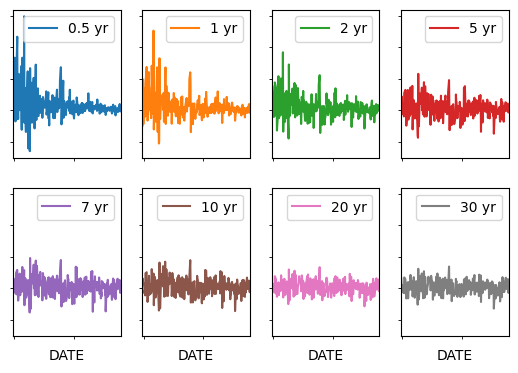

In [12]:
r_df = df.pct_change()

r_df.plot(subplots=True, layout=(2,4), 
          sharex = True, sharey = True,
          xticks = [],yticks =[],
          xlim = (df.index.min(), df.index.max()))

(-0.1, 0.25)

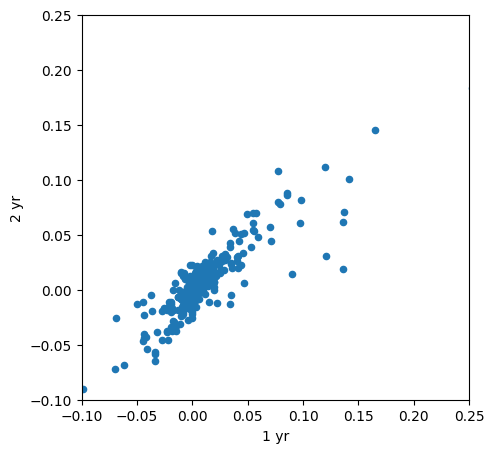

In [13]:
fig, ax = plt.subplots(figsize = (5,5))
r_df.plot.scatter(x="1 yr", y="2 yr",
                  ax = ax)

ax.set_xlim(-0.1, 0.25)
ax.set_ylim(-0.1, 0.25)

(-0.1, 0.25)

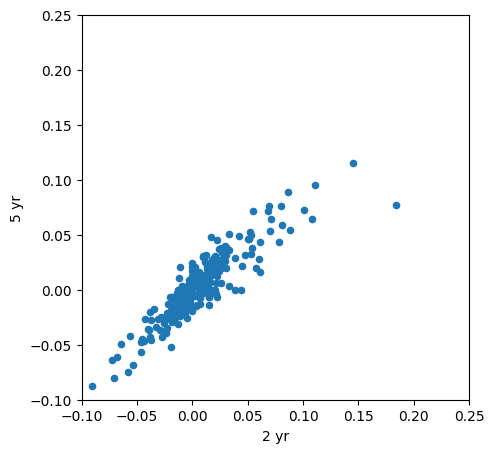

In [14]:
fig, ax = plt.subplots(figsize = (5,5))
r_df.plot.scatter(x="2 yr", y="5 yr",
                  ax = ax)

ax.set_xlim(-0.1, 0.25)
ax.set_ylim(-0.1, 0.25)

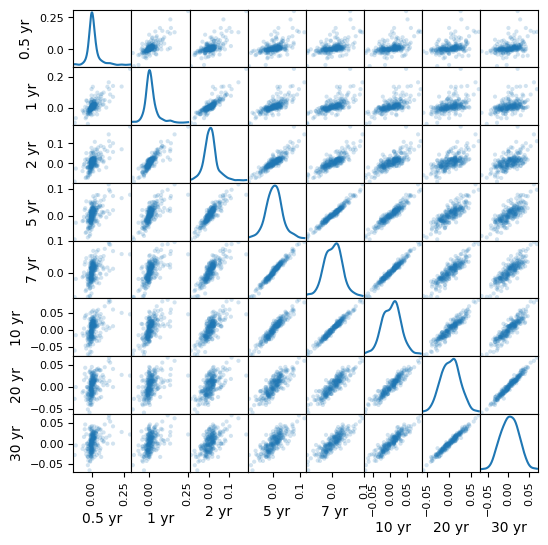

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(r_df, alpha=0.2, figsize=(6, 6), diagonal="kde")
plt.show()

(-0.1, 0.25)

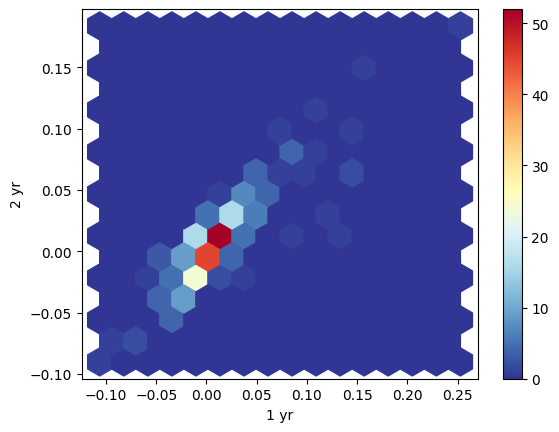

In [16]:
r_df.plot.hexbin(x="1 yr", y="2 yr",
                 gridsize = 15,
                 cmap="RdYlBu_r")
ax.set_xlim(-0.1, 0.25)
ax.set_ylim(-0.1, 0.25)

<Axes: >

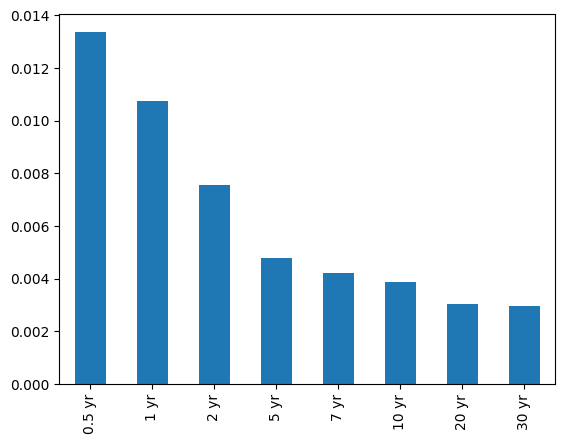

In [17]:
r_df.mean().plot.bar()

<Axes: >

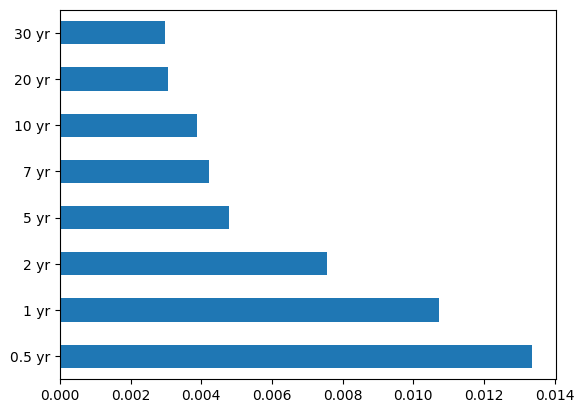

In [18]:
r_df.mean().plot.barh()

<Axes: >

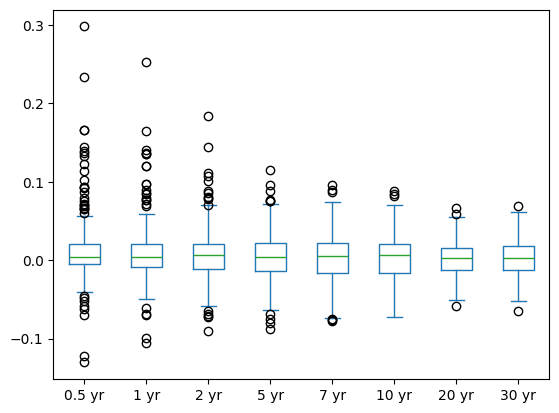

In [19]:
r_df.plot.box()

<Axes: >

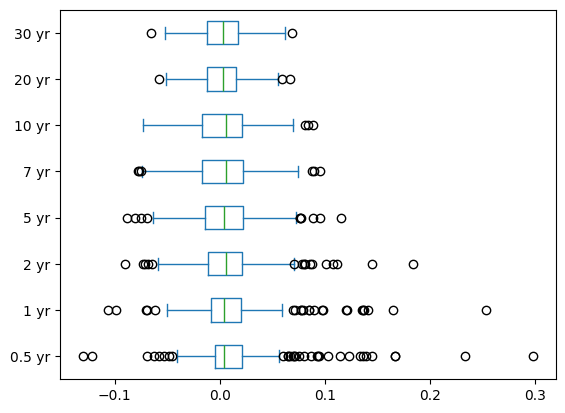

In [21]:
r_df.plot.box(vert=False)

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

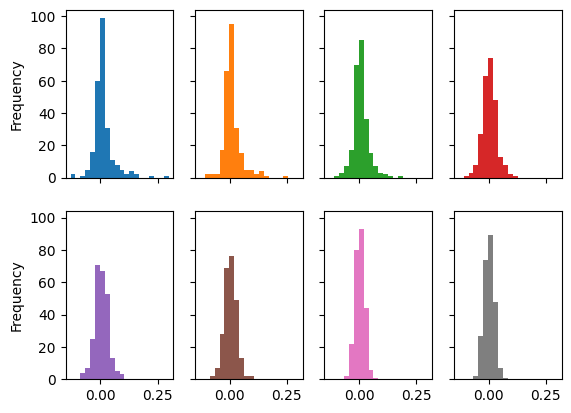

In [22]:
r_df.plot.hist(subplots=True, layout=(2,4), 
               sharex = True, sharey = True,
               bins = 20,
               legend = False)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

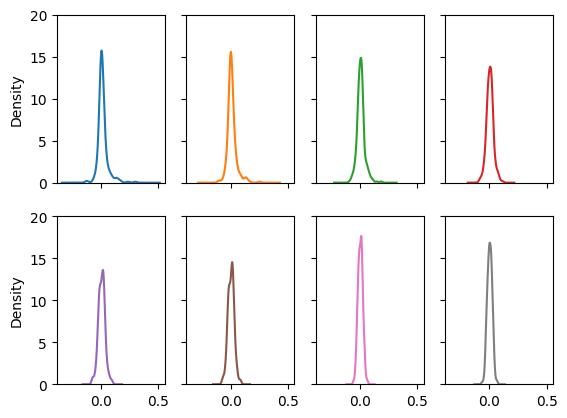

In [24]:
r_df.plot.kde(subplots=True, layout=(2,4), 
              sharex = True, sharey = True,
              ylim = (0,20),
              legend = False)

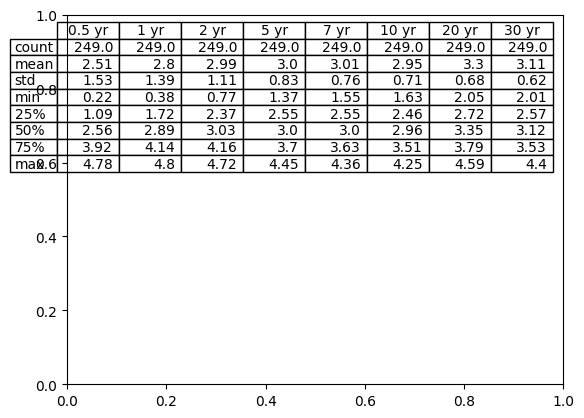

In [25]:
from pandas.plotting import table
fig, ax = plt.subplots(1, 1)

table(ax, np.round(df.describe(), 2), loc="upper right")